# Frequency Response of an LRC Circuit

Simulate the behavior of a driven LRC circuit with $R$=23$\Omega$, $C$=654nF and $L$=3.2mH.

The LRC circuit can be treated as a voltage divider with complex impedances $Z_R = R$, $Z_C = 1 / (i \omega C)$ and $Z_L=i\omega{}L$. The voltage across one of the components $R,C,L$ is then given by:
$$
  U_{R,C,L} = U_0 \frac{Z_{R,C,L}}{Z_R + Z_C + Z_L}
$$
where $U_0$ is the output voltage of the voltage source. Because $Z_C$ and $Z_L$ depend on the frequency, this calculation cannot be done in the time domain, but only in the frequency domain.

In [1]:
import numpy as np
from numpy import sin,cos,log,log10
import matplotlib.pyplot as plt

R = 23     # ohm
C = 654e-9 # farad
L = 3.2e-3 # henry

nsamples = 1024  # number of samples
fsamp = 1000000  # sampling rate

## Fourier spectrum (4 points)

Apply a discrete fourier transform to the following time-descrete signals with 1024 samples taken at a sampling rate of 1 MHz:

- sinusiodal signals $U_0(t) = \sin ( 2 \pi f t )$ with frequencies of 90 kHz and 125 kHz
- square wave signals with frequencies of 15625 Hz and 20000 Hz

Plot the Fourier spectrum of these signals.

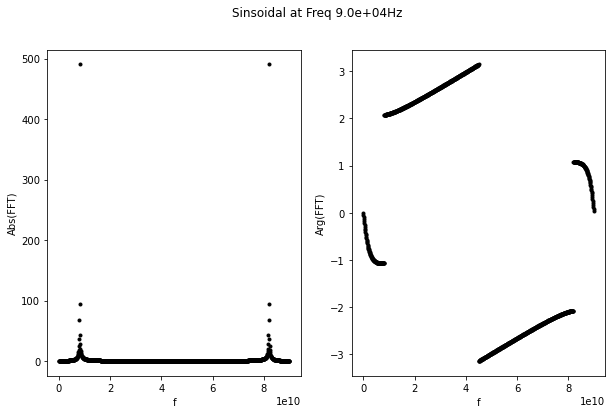

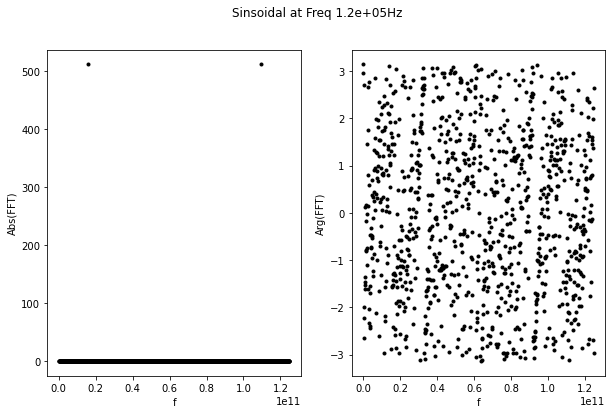

In [26]:
plt.rcParams['figure.figsize'] = [10, 6]
#plt.rcParams['figure.dpi'] = 150

def sinusoidal(f,t):
    return np.sin(2*np.pi*f*t)


f_options = [90e3,125e3]

t = np.fromiter((n / fsamp for n in range(nsamples)), float)

for f in f_options:
    
    fig, axs = plt.subplots(1, 2)
    samples = sinusoidal(f, t)

    output = np.fft.fft(samples)
    #freqs = np.fft.fftfreq(t.shape[-1])
    freqs = np.arange(nsamples) / (nsamples / fsamp) * f

    axs[0].plot(freqs, np.abs(output), 'ko', lw=0, ms=3)
    axs[0].set_xlabel("f")
    axs[0].set_ylabel("Abs(FFT)")
    
    axs[1].plot(freqs, np.angle(output),'ko',lw=0, ms=3)
    axs[1].set_xlabel("f")
    axs[1].set_ylabel("Arg(FFT)")
    
    fig.suptitle(f"Sinsoidal at Freq {f:.1e}Hz")

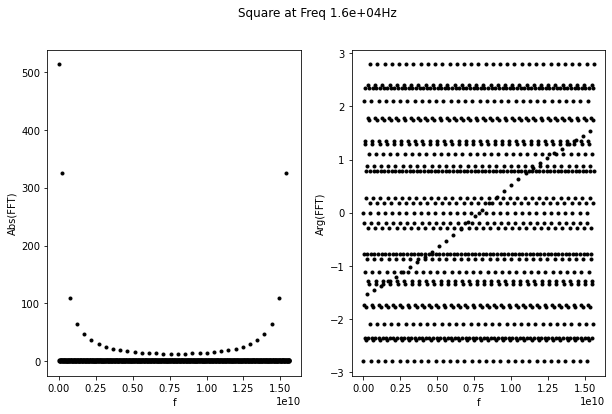

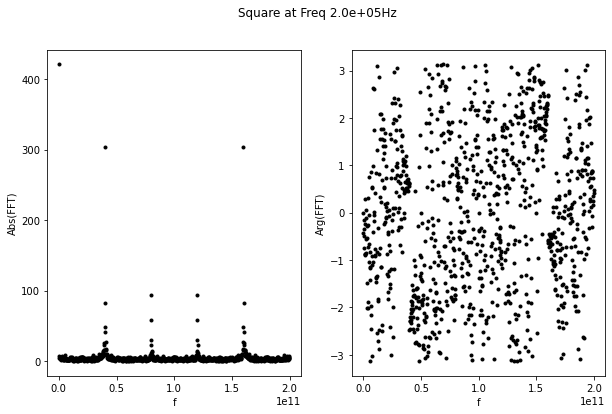

In [28]:
def square(f, t):
    delta = 1 / f
    gap = delta / 2
    if t % delta < gap:
        return 1
    return 0

t = np.fromiter((n / fsamp for n in range(nsamples)), float)

f_options = [15625, 200e3]
vec_square = np.vectorize(square)

for i, f in enumerate(f_options):
    
    fig, axs = plt.subplots(1, 2)
    samples = vec_square(f,t)

    output = np.fft.fft(samples)
    freqs = np.arange(nsamples) / (nsamples / fsamp) * f

    axs[0].plot(freqs, np.abs(output), 'ko', lw=0, ms=3)
    axs[0].set_xlabel("f")
    axs[0].set_ylabel("Abs(FFT)")
    
    axs[1].plot(freqs, np.angle(output),'ko',lw=0, ms=3)
    axs[1].set_xlabel("f")
    axs[1].set_ylabel("Arg(FFT)")

    fig.suptitle(f"Square at Freq {f:.1e}Hz")

Discuss the Fourier spectra of the four signals from the previous question.

YOUR ANSWER HERE

## Circuit analysis (3 points)

Determine the ratios of the voltages across resistor ($U_R/U_0$), capacitor ($U_C/U_0$) and inductor ($U_L/U_0$) to the input voltage in the frequency domain. Visualize your results. For which frequencies are the voltage amplitudes over resistor, capacitor and inductor maximal?

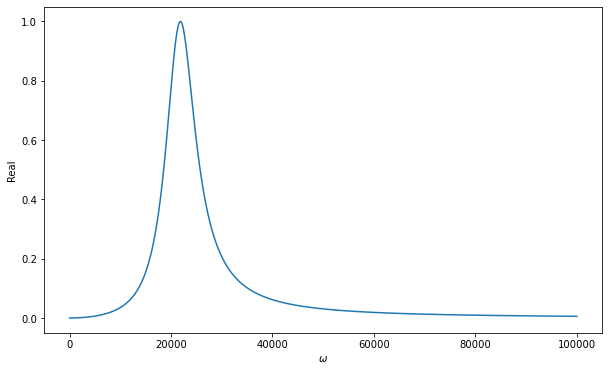

Achieved max of 1.000000e+00 at omega=2.186000e+04


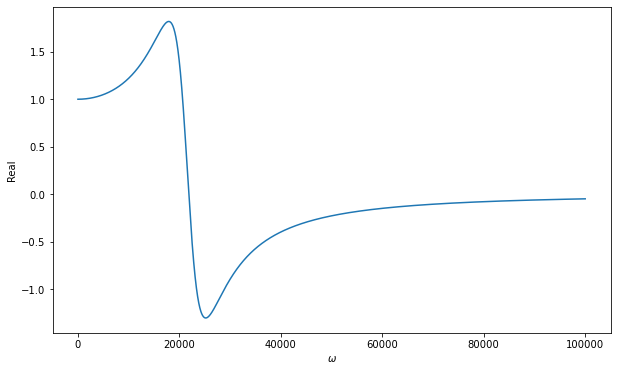

Achieved max of 1.819834e+00 at omega=1.791000e+04


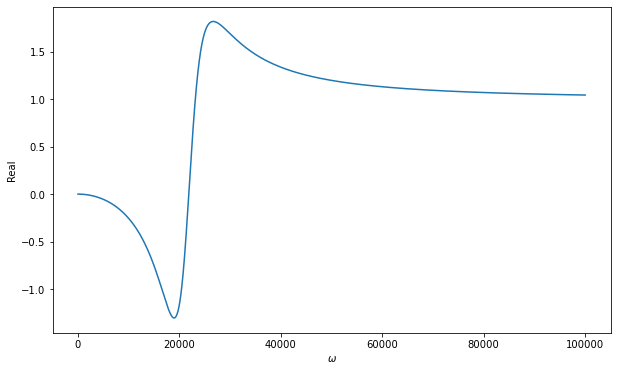

Achieved max of 1.819834e+00 at omega=2.668000e+04


In [29]:
def Z_C(omega):
    return 1 / (1j * omega * C)

def Z_L(omega):
    return 1j * omega * L 

def Z_sum(omega):
    return R + Z_L(omega) + Z_C(omega)

def U_R_ratio(omega):
    return R / Z_sum(omega)

def U_L_ratio(omega):
    return Z_L(omega) / Z_sum(omega)

def U_C_ratio(omega):
    return Z_C(omega) / Z_sum(omega)
    
omega = np.linspace(1e1, 1e5, 10000)


ratio_funcs = [U_R_ratio, U_C_ratio, U_L_ratio]

for func in ratio_funcs:
    mag = func(omega).real
    plt.plot(omega, mag)
    plt.xlabel(r"$\omega$")
    plt.ylabel("Real")
    plt.show()
    
    max_mag = np.max(mag)
    max_omega = omega[np.where(mag == max_mag)][0]
    print(f"Achieved max of {max_mag:e} at omega={max_omega:e}")
    
    

In [39]:
# SET THESE VARIABLE TO THE FREQUENCIES WHERE THE RESPECTIVE VOLTAGE IS MAXIMAL
frmax = 2.186e4
fcmax = 1.791e4 
flmax = 2.668e4

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
assert(frmax>0)

In [ ]:
assert(fcmax>0)
assert(flmax>0)

## Signals in the time domain (3 points)

Calculate the voltages across resistor, capacitor and inductor in the time domain, i.e. as a function of time. Visualize your results for several sinusoidal and square waveforms that you find interesting.

Briefly describe the frequency dependence of the voltages in the circuit. Can you spot any unexpected features?

$$ U_0(t) = fourier(U_0(\omega))$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE